In [2]:
import numpy as np

from scipy.interpolate import interp1d
from scipy.signal import argrelmin

from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

import os
import pickle

# Load Positions

In [3]:
run_folder = "track_data/Straight_Line/run-1"
positions = pickle.load(open(os.path.join(run_folder, "positions.pkl"), "rb"))
finish_time = positions[-1]["time"]/1000

raw_points = [list(pos['position'].to_numpy()) for pos in positions]
    
# remove duplicates:
points = [raw_points[0]]
for point in raw_points[1:]:
    if point != points[-1]:
        points.append(point)
    else:
        for i in range(len(point)):
            point[i] += 0.01
        points.append(point)
points = np.array(points)
print("finish_time: ", finish_time)
print(points)

finish_time:  20.32
[[820.79998779  10.21000004 592.        ]
 [820.80998779  10.22000004 592.01      ]
 [820.79998779  10.20699978 592.        ]
 ...
 [278.99887085   9.35920429 591.99957275]
 [278.71487427   9.3591671  591.99957275]
 [278.43185425   9.35913754 591.99957275]]


# Parametric Curve

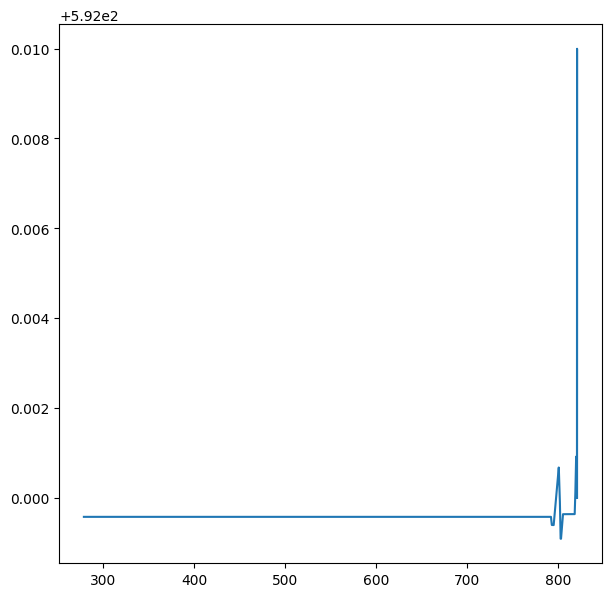

In [6]:
# Time along the track:
time = np.linspace(0, 1, len(points))

# Interpolation for different methods:
interpolations_methods = ['slinear']
alpha = np.linspace(0, 1, len(points)*100)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(time, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)

# Graph:
plt.figure(figsize=(7,7))
for method_name, curve in interpolated_points.items():
    plt.plot(*curve[:, [0, 2]].T, '-', label=method_name);

In [7]:
interpolator =  interp1d(time, points, kind='slinear', axis=0)
alpha = np.linspace(0, 1, len(points)*100)
curve = interpolator(alpha)
len(alpha)

203300

In [9]:
curve[-10:-1]

array([[278.45731365,   9.35914019, 591.99957275],
       [278.45448482,   9.3591399 , 591.99957275],
       [278.451656  ,   9.3591396 , 591.99957275],
       [278.44882718,   9.35913931, 591.99957275],
       [278.44599836,   9.35913901, 591.99957275],
       [278.44316954,   9.35913872, 591.99957275],
       [278.44034071,   9.35913842, 591.99957275],
       [278.43751189,   9.35913813, 591.99957275],
       [278.43468307,   9.35913783, 591.99957275]])

# Closest Point

In [11]:
def distance_3D(x, y, z, x0, y0, z0):
    d_x = x - x0
    d_y = y - y0
    d_z = z - z0
    dis = np.sqrt( d_x**2 + d_y**2 + d_z**2)
    return dis

In [14]:
# This is what we really got
alpha = np.linspace(0, 1, len(points)*100)
coords = interpolator(alpha)
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
coords

array([[820.79998779,  10.21000004, 592.        ],
       [820.80008774,  10.21009999, 592.00009995],
       [820.8001877 ,  10.21019994, 592.0001999 ],
       ...,
       [278.43751189,   9.35913813, 591.99957275],
       [278.43468307,   9.35913783, 591.99957275],
       [278.43185425,   9.35913754, 591.99957275]])

In [16]:
# The point P
P = [278.44034071,   9.35913842, 591.99957275]

# compute distance
dis = distance_3D(x, y, z, P[0], P[1], P[2])
# find the minima
glob_min_idx = np.argmin(dis)
# coordinates and distance
min_x = x[glob_min_idx]
min_y = y[glob_min_idx]
min_z = z[glob_min_idx]
min_d = dis[glob_min_idx]

associated_time = (glob_min_idx/(len(alpha)-1))*finish_time
print(associated_time)
print(glob_min_idx)

20.31970014609024
203296


In [17]:
interpolator(alpha[glob_min_idx])

array([278.44034071,   9.35913842, 591.99957275])

In [18]:
print(min_x, min_y, min_z)

278.4403407139866 9.359138421580429 591.9995727539062


In [19]:
min_d

5.800840488355166e-09

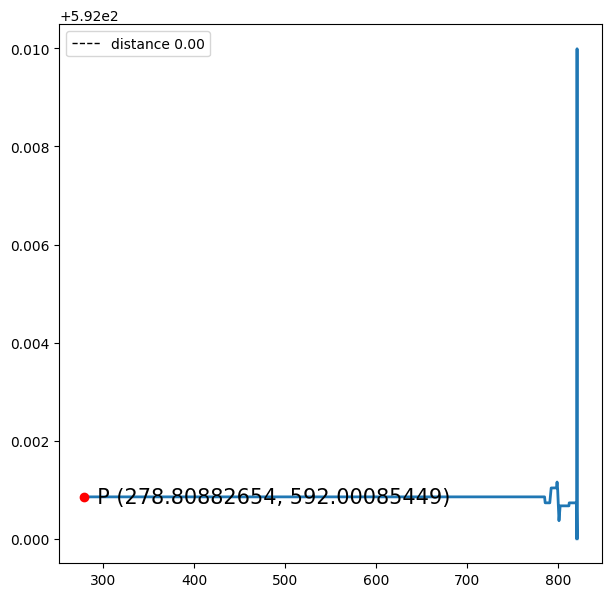

In [58]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(x, z, lw=2)
ax.plot(
    [P[0], min_x],
    [P[2], min_z],
    'k--', lw=1,
    label=f'distance {min_d:.2f}'
)

display_P = (P[0], P[2])
ax.plot(*display_P, 'or')
ax.text(
    P[0], P[2], 
    f"  P ({P[0]}, {P[2]})", 
    ha='left', va='center',
    fontsize=15
)
ax.legend()
plt.show()

# Test